In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import plotly.express as px
import scipy

pd.set_option('display.max_columns', 30)

In [2]:
data_types = {
    "Contract Amount": float,
    "Annual Amount": float,
    'Property ID': int,
    'Number of Rooms': float,
    'No of Units': int,
    "Master Project": str,
    "Project": str,
}

df = pd.read_csv("data/rents.csv", delimiter=';', decimal=',', dtype=data_types, parse_dates=['Registration Date', "Start Date", "End Date"], dayfirst=True)

In [3]:
#df.isnull().sum()

In [4]:
#df["Start Date"].sort_values()

In [3]:
df = df.drop(index=[3138733,3244626, 2372834])

In [6]:
#msno.matrix(df)

In [4]:
df.Parking = df.Parking.fillna(0).astype(int)
df["End Date"] = pd.to_datetime(df["End Date"], format="%d/%m/%Y %H:%M:%S", errors='coerce')

In [8]:
#df.info()

In [5]:
some_cols = [ 'Area', 'Property Type',
       'Property Sub Type', 'Number of Rooms', 'Usage', 'Nearest Metro',
       'Nearest Mall', 'Nearest Landmark', 'Master Project', 'Project']

for x in some_cols:
    df[x]=df[x].fillna("N/A")

In [6]:
#df.isnull().sum()

In [11]:
#df.describe()

In [12]:
#df[['Contract Amount','Annual Amount']].describe()

In [13]:
#fig = px.scatter(df, x="Start Date", y="Contract Amount", trendline="ols", trendline_color_override="red")
#fig.write_image("rents1a.png")

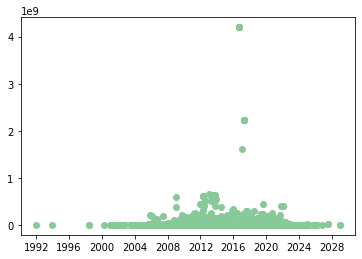

In [14]:
plt.scatter(df["Start Date"], df["Contract Amount"], color = '#88c999')
plt.show()

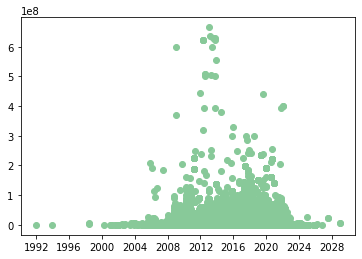

In [30]:
plt.scatter(df[df["Contract Amount"]<1000000000]["Start Date"], df[df["Contract Amount"]<1000000000]["Contract Amount"], color = '#88c999')
plt.show()

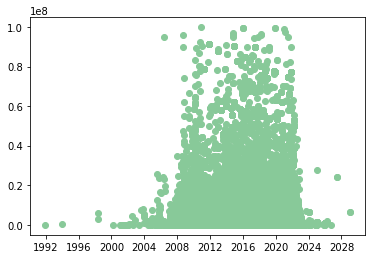

In [35]:
plt.scatter(df[df["Contract Amount"]<100000000]["Start Date"], df[df["Contract Amount"]<100000000]["Contract Amount"], color = '#88c999')
plt.show()

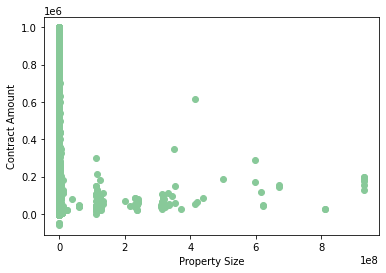

In [10]:
plt.scatter(df[df["Contract Amount"]<1000000]["Property Size (sq.m)"], df[df["Contract Amount"]<1000000]["Contract Amount"], color = '#88c999')
plt.xlabel('Property Size')
plt.ylabel('Contract Amount')
plt.show()

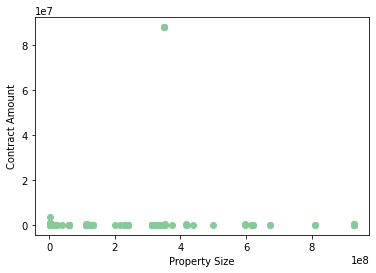

In [16]:
plt.scatter(df[df["Property Size (sq.m)"]>1600000]["Property Size (sq.m)"], df[df["Property Size (sq.m)"]>1600000]["Contract Amount"], color = '#88c999')
plt.xlabel('Property Size')
plt.ylabel('Contract Amount')
plt.show()

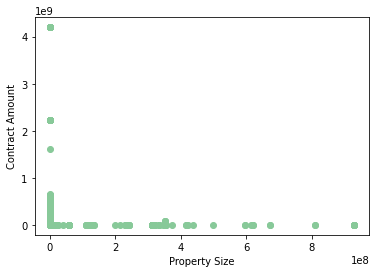

In [8]:
plt.scatter(df["Property Size (sq.m)"], df["Contract Amount"], color = '#88c999')
plt.xlabel('Property Size')
plt.ylabel('Contract Amount')
plt.show()

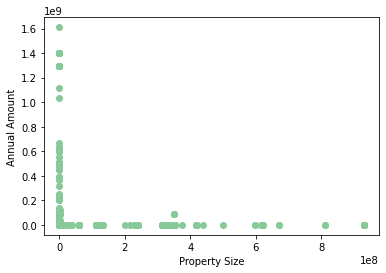

In [12]:
plt.scatter(df["Property Size (sq.m)"], df["Annual Amount"], color = '#88c999')
plt.xlabel('Property Size')
plt.ylabel('Annual Amount')
plt.show()

In [43]:
df = df.dropna()

r, p = scipy.stats.pearsonr(df["Contract Amount"], df['Property Size (sq.m)'])
print(r, p)

r, p = scipy.stats.spearmanr(df["Contract Amount"], df['Property Size (sq.m)'])
print(r, p)

r, p = scipy.stats.pearsonr(df["Annual Amount"], df['Property Size (sq.m)'])
print(r, p)

r, p = scipy.stats.spearmanr(df["Annual Amount"], df['Property Size (sq.m)'])
print(r, p)

0.000867160858788134 0.04268901044446136
0.2541675177138218 0.0
0.002250990928353309 1.4323361520589145e-07
0.26312410868912717 0.0


In [48]:
df.corr("spearman")

,Ejari Contract Number,Property ID,Contract Amount,Annual Amount,Property Size (sq.m),Parking,No of Units
Ejari Contract Number,1.000000,0.345726,0.000071,-0.008930,-0.003493,-0.064761,-0.003042
Property ID,0.345726,1.000000,0.100478,0.093594,-0.100990,-0.020581,0.221590
Contract Amount,0.000071,0.100478,1.000000,0.971186,0.254168,0.109328,0.523318
Annual Amount,-0.008930,0.093594,0.971186,1.000000,0.263124,0.116250,0.523736
Property Size (sq.m),-0.003493,-0.100990,0.254168,0.263124,1.000000,0.145286,-0.253847
Parking,-0.064761,-0.020581,0.109328,0.116250,0.145286,1.000000,-0.043646
No of Units,-0.003042,0.221590,0.523318,0.523736,-0.253847,-0.043646,1.000000


In [50]:
df

,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Version,Area,Contract Amount,Annual Amount,Is Free Hold?,Property Size (sq.m),Property Type,Property Sub Type,Number of Rooms,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,Parking,No of Units,Master Project,Project
0,120210425000238,2021-04-25 09:36:31,2021-04-13,2026-04-12,1058329686,New,Dubai Investment Park Second,25000.0,5000.0,Free Hold,7488.95,Building,Factory,N/A,Industrial,N/A,N/A,Expo 2020 Site,0,1,N/A,N/A
1,120210526001582,2021-05-26 12:12:22,2021-06-01,2025-11-30,99539298,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,6792.00,Building,Building,N/A,Residential,N/A,N/A,N/A,0,1,N/A,N/A
2,120210526001913,2021-05-26 12:47:49,2021-06-15,2025-12-14,99539289,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,6481.94,Building,Building,N/A,Residential,N/A,N/A,N/A,0,1,N/A,N/A
3,120210526002150,2021-05-26 13:14:55,2021-07-01,2025-12-31,99539307,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,6792.00,Building,Building,N/A,Residential,N/A,N/A,N/A,0,1,N/A,N/A
4,120210526002235,2021-05-26 13:27:36,2021-07-15,2026-01-14,99539316,New,Um Nahad Third,16000000.0,4000000.0,Free Hold,6481.94,Building,Building,N/A,Residential,N/A,N/A,N/A,0,1,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475126,99821944,2013-06-24 09:38:01,2013-09-10,2014-09-09,557988,Renewed,Al Safouh Second,150000.0,150000.0,Non Free Hold,171.00,Villa,Villa,N/A,Residential,Knowledge Village,Marina Mall,Burj Al Arab,2,1,N/A,N/A
5475127,120141110001107,2015-03-19 10:18:19,2015-02-21,2016-02-20,557991,Renewed,Al Safouh Second,165000.0,165000.0,Non Free Hold,171.00,Villa,Villa,N/A,Residential,Knowledge Village,Marina Mall,Burj Al Arab,2,1,N/A,N/A
5475128,120130716001123,2015-03-15 11:50:17,2015-03-21,2016-03-20,558048,Renewed,Al Safouh Second,168000.0,168000.0,Non Free Hold,165.00,Villa,Villa,N/A,Residential,Knowledge Village,Marina Mall,Burj Al Arab,2,1,N/A,N/A
5475129,120140515002099,2015-03-09 13:35:26,2015-05-29,2016-05-28,558024,Renewed,Al Safouh Second,180000.0,180000.0,Non Free Hold,165.00,Villa,Villa,N/A,Residential,Knowledge Village,Marina Mall,Burj Al Arab,2,1,N/A,N/A


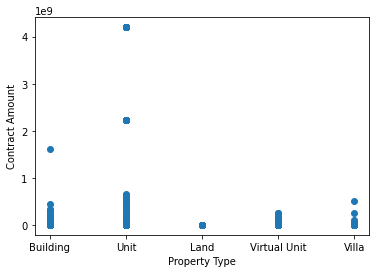

In [34]:
plt.scatter(df['Property Type'], df["Contract Amount"])
plt.xlabel('Property Type')
plt.ylabel('Contract Amount')
plt.show()

In [ ]:
plt.bar(df['Property Type'], df["Contract Amount"])
plt.xlabel('Property Type')
plt.ylabel('Contract Amount')
plt.show()

In [31]:
df['Property Type'].value_counts()

Unit            4966080
Villa            422407
Virtual Unit      47614
Land              36218
Building           2809
Name: Property Type, dtype: int64

In [32]:
df['Property Type'].str.get_dummies()

,Building,Land,Unit,Villa,Virtual Unit
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
5475126,0,0,0,1,0
5475127,0,0,0,1,0
5475128,0,0,0,1,0
5475129,0,0,0,1,0


In [60]:
df.sort_values(['Contract Amount']).tail(25)

,Ejari Contract Number,Registration Date,Start Date,End Date,Property ID,Version,Area,Contract Amount,Annual Amount,Is Free Hold?,Property Size (sq.m),Property Type,Property Sub Type,Number of Rooms,Usage,Nearest Metro,Nearest Mall,Nearest Landmark,Parking,No of Units,Master Project,Project
1714366,220170517001010,2017-05-17 11:26:34,2017-04-15,2018-12-31,1961574948,New,Al Sabkha,2.220835e+09,1.296940e+09,Non Free Hold,59.0,Unit,Hotel,N/A,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0,20,N/A,N/A
1714357,220170517001010,2017-05-17 11:26:34,2017-04-15,2018-12-31,1961567388,New,Al Sabkha,2.220835e+09,1.296940e+09,Non Free Hold,59.0,Unit,Hotel,N/A,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0,20,N/A,N/A
1714364,220170517001010,2017-05-17 11:26:34,2017-04-15,2018-12-31,1961574228,New,Al Sabkha,2.220835e+09,1.296940e+09,Non Free Hold,59.0,Unit,Hotel,N/A,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0,20,N/A,N/A
1714362,220170517001010,2017-05-17 11:26:34,2017-04-15,2018-12-31,1961573508,New,Al Sabkha,2.220835e+09,1.296940e+09,Non Free Hold,59.0,Unit,Hotel,N/A,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0,20,N/A,N/A
1714361,220170517001010,2017-05-17 11:26:34,2017-04-15,2018-12-31,1961573148,New,Al Sabkha,2.220835e+09,1.296940e+09,Non Free Hold,59.0,Unit,Hotel,N/A,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0,20,N/A,N/A
1714350,220170517001010,2017-05-17 11:26:34,2017-04-15,2018-12-31,1961564868,New,Al Sabkha,2.220835e+09,1.296940e+09,Non Free Hold,59.0,Unit,Hotel,N/A,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0,20,N/A,N/A
1714360,220170517001010,2017-05-17 11:26:34,2017-04-15,2018-12-31,1961572788,New,Al Sabkha,2.220835e+09,1.296940e+09,Non Free Hold,59.0,Unit,Hotel,N/A,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0,20,N/A,N/A
1714351,220170517001010,2017-05-17 11:26:34,2017-04-15,2018-12-31,1961565228,New,Al Sabkha,2.220835e+09,1.296940e+09,Non Free Hold,59.0,Unit,Hotel,N/A,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0,20,N/A,N/A
1714359,220170517001010,2017-05-17 11:26:34,2017-04-15,2018-12-31,1961568108,New,Al Sabkha,2.220835e+09,1.296940e+09,Non Free Hold,59.0,Unit,Hotel,N/A,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0,20,N/A,N/A
1714358,220170517001010,2017-05-17 11:26:34,2017-04-15,2018-12-31,1961567748,New,Al Sabkha,2.220835e+09,1.296940e+09,Non Free Hold,59.0,Unit,Hotel,N/A,Commercial,Palm Deira Metro Stations,Dubai Mall,Dubai International Airport,0,20,N/A,N/A
